In [48]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [49]:
def get_exps_data(base_path):
    assert os.path.exists(base_path)
    exp_name = os.path.basename(os.path.normpath(base_path))
    # Get hyperparameters
    params_path = os.path.join(base_path, 'hyperparameters.json')
    assert os.path.exists(params_path)
    with open(params_path, 'r') as f:
        params = json.loads(f.read())
    path_prefix = 'pan20_train_'
    views_data = {
        'DV_MA_k_300': {},
        'DV_MA_k_3000': {},
        'DV_MA_k_20000': {},
        'undistorted': {}
    }
    for view in views_data.keys():
        view_path = os.path.join(base_path, path_prefix + view)
        assert os.path.exists(view_path)
        assert os.path.isdir(view_path)
        losses_file = os.path.join(view_path, exp_name + '_raw_losses.npy')
        assert os.path.exists(losses_file)
        views_data[view]['losses'] = np.load(losses_file)

    return views_data, params

In [50]:
base_path = "/Users/zacbolton/dev/BSc/FP/historical_av_with_SBERT/saved_experiments/valla_validation_restarted"
exps_data, params = get_exps_data(base_path)

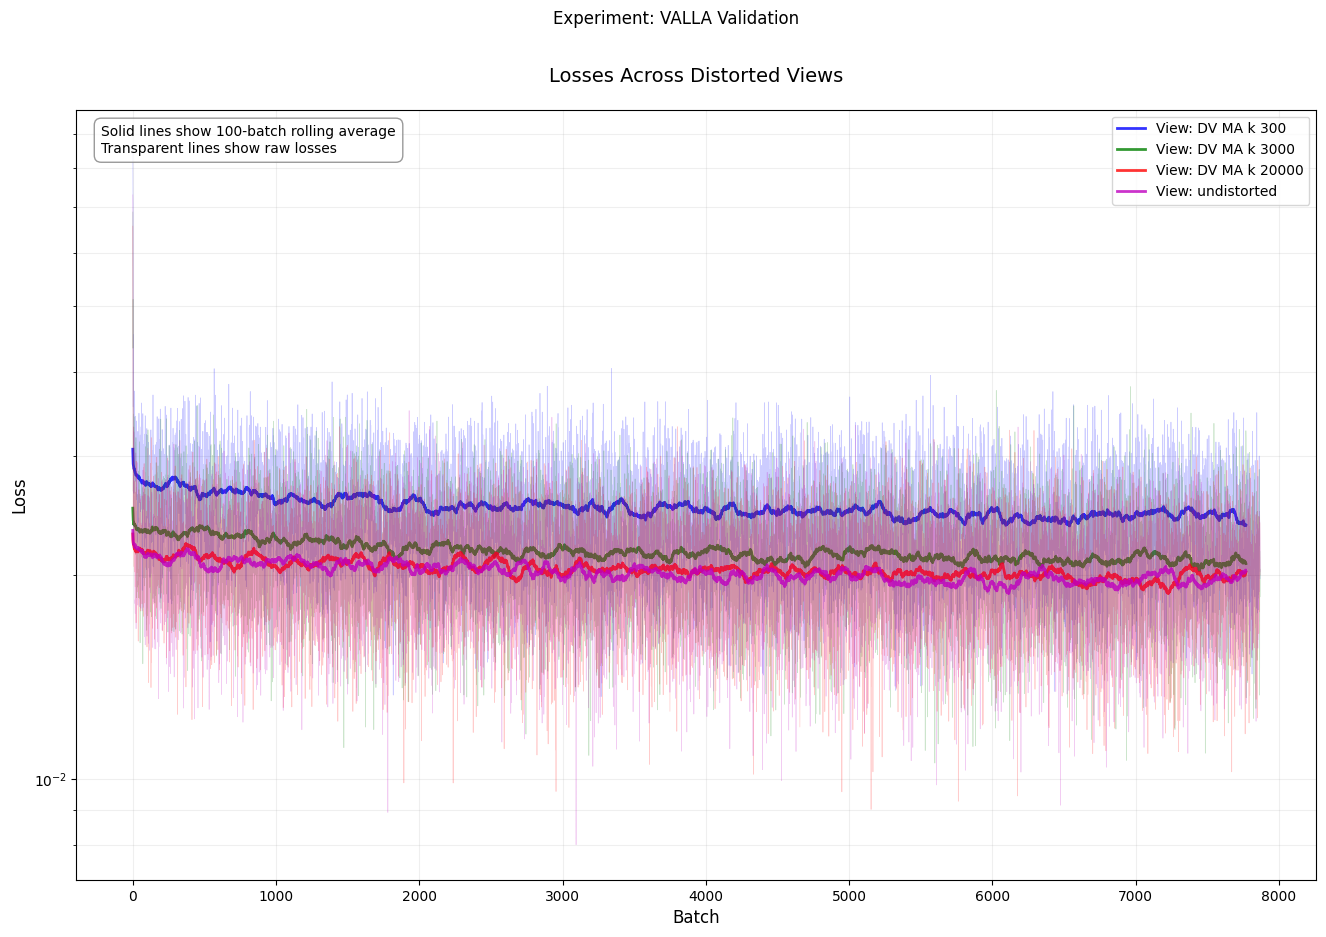

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

colors = {
    'DV_MA_k_300': 'b',
    'DV_MA_k_3000': 'g',
    'DV_MA_k_20000': 'r',
    'undistorted': 'm'
}

window = 100

# Adapted from:
# https://www.ikigailabs.io/multivariate-time-series-forecasting-in-python-settings/python-moving-average-numpy
for view, color in colors.items():
    losses = np.array(exps_data[view]['losses'])
    if losses.ndim > 1:
        losses = losses.flatten()

    smoothed_losses = np.convolve(losses,
                                  np.ones(window)/window, mode='valid')
    batch_numbers = np.arange(len(smoothed_losses))

    ax.plot(batch_numbers, smoothed_losses,
            color=color, 
            label=f'View: {view.replace("_", " ")}',
            linewidth=2,
            alpha=0.8)

    ax.plot(np.arange(len(losses)), losses,
            color=color,
            linewidth=0.5,
            alpha=0.2)

ax.set_xlabel('Batch', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_yscale('log')
ax.grid(True, which="both", ls="-", alpha=0.2)
ax.set_title('Losses Across Distorted Views',
             fontsize=14, pad=20)

annotation_text = (f"Solid lines show {window}-batch rolling average\n"
                   "Transparent lines show raw losses")
ax.annotate(annotation_text,
            xy=(0.02, 0.98),
            xycoords='axes fraction',
            bbox=dict(boxstyle='round,pad=0.5',
                      fc='white',
                      ec='gray',
                      alpha=0.8),
            verticalalignment='top',
            fontsize=10)

ax.legend()

plt.suptitle('Experiment: VALLA Validation')
plt.show()